<a href="https://colab.research.google.com/github/spandanag333/ML_Projects/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df.shape

(200, 5)

In [3]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [5]:
df.groupby('Gender').count()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,112,112,112,112
Male,88,88,88,88


**Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


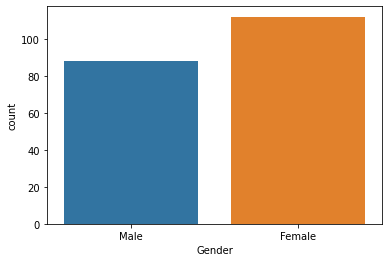

In [6]:
import seaborn as sns
sns.countplot('Gender',data=df)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


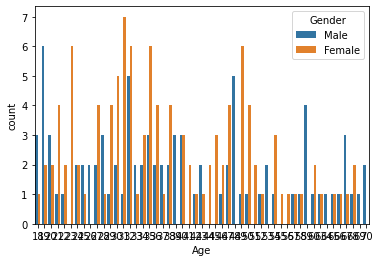

In [7]:
sns.countplot('Age',hue='Gender',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


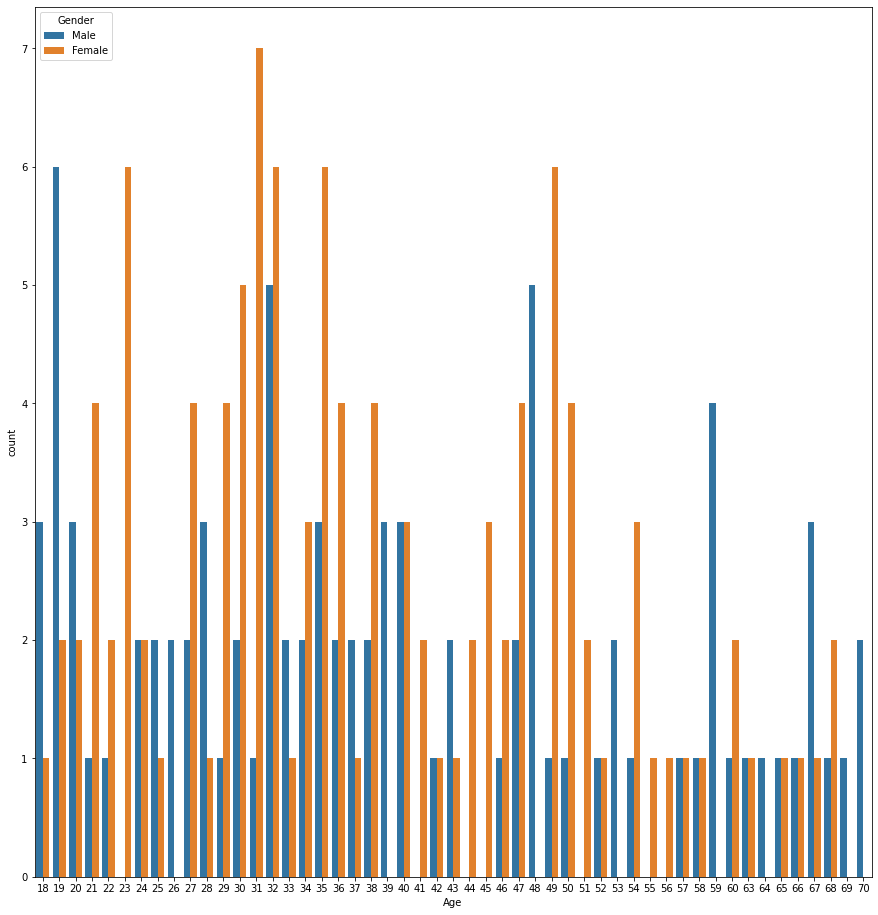

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,16))
sns.countplot('Age',hue='Gender',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


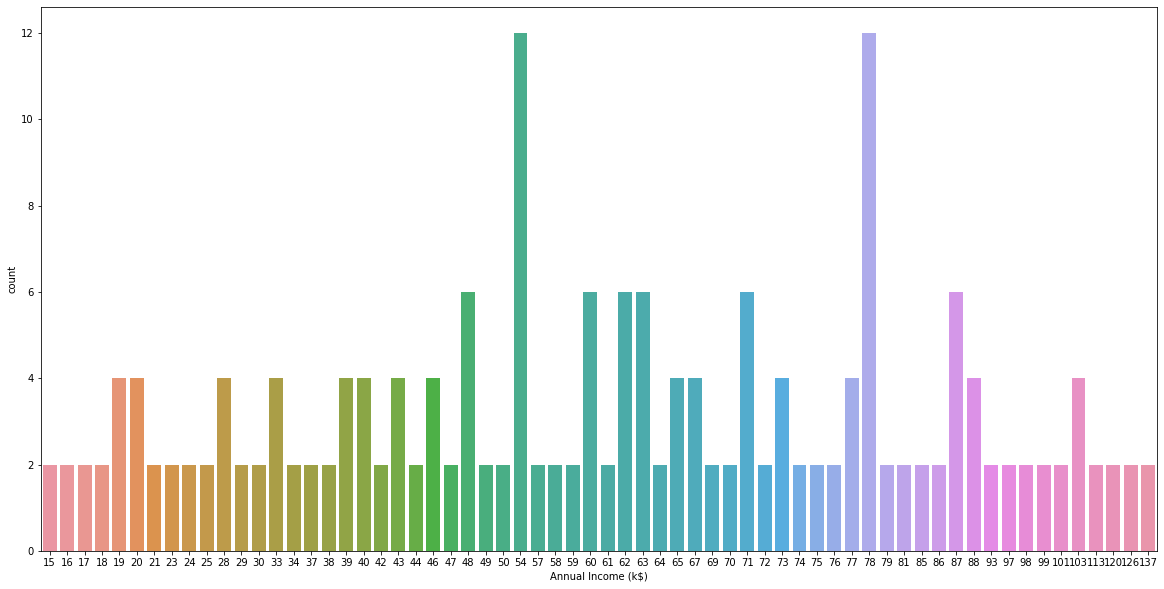

In [11]:
f,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot('Annual Income (k$)',data=df)


<Figure size 1080x432 with 0 Axes>

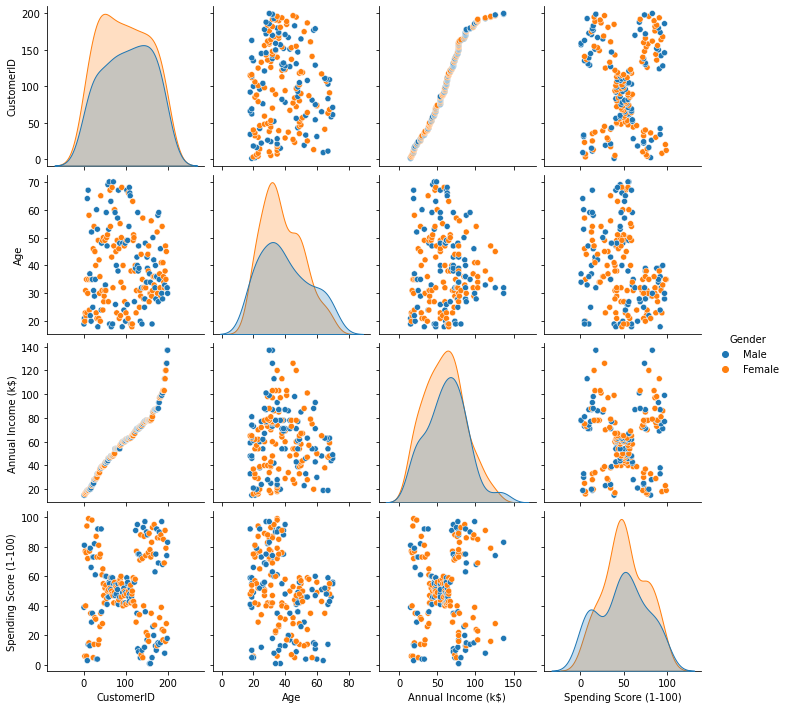

In [14]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.pairplot(df, hue='Gender')


In [16]:
df = df.drop(['Gender','CustomerID'],axis = 1)

In [17]:

from sklearn.cluster import KMeans
clusters=[]
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(df)
    clusters.append(km.inertia_)
clusters



[308812.78,
 212840.16982097185,
 143342.751571706,
 104366.15145556198,
 75350.77917248776,
 58300.44332159069,
 51412.06519138756,
 44307.87341670445,
 40919.64792495438,
 37543.832692470925]

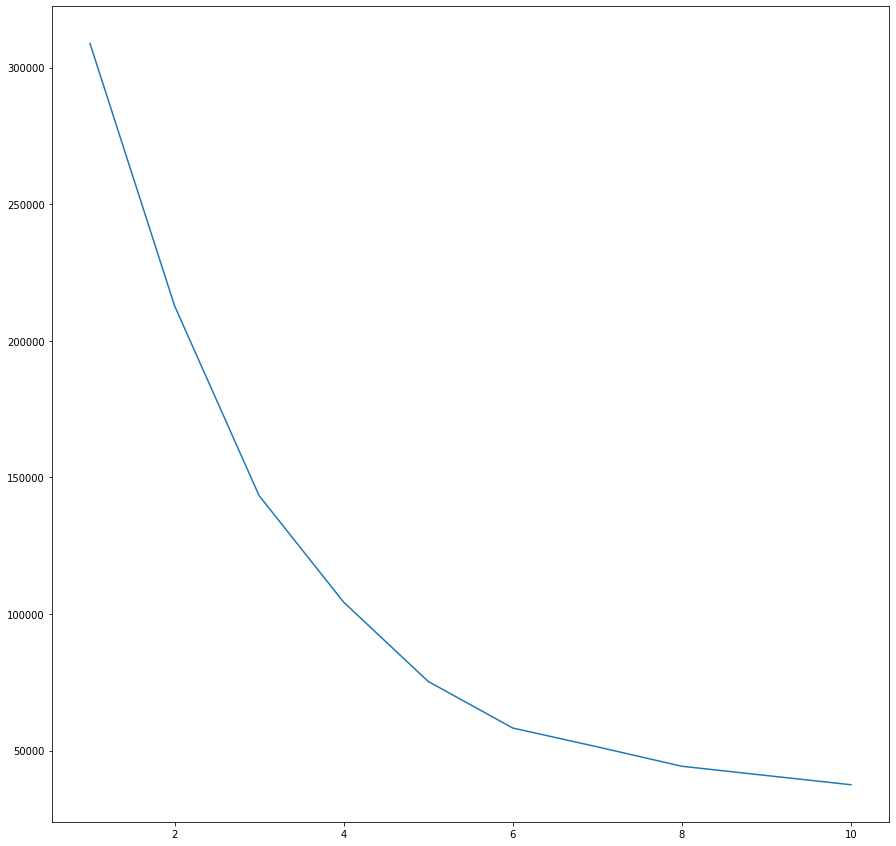

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.plot(list(range(1, 11)), clusters)
 
#sns.lineplot(x=list(range(1, 11)), y=clusters)


AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


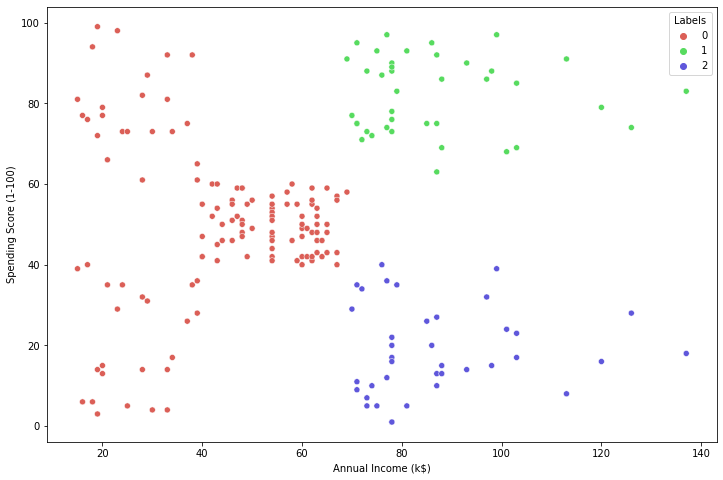

In [26]:
km3 = KMeans(n_clusters=3).fit(df)
 
df['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=df['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


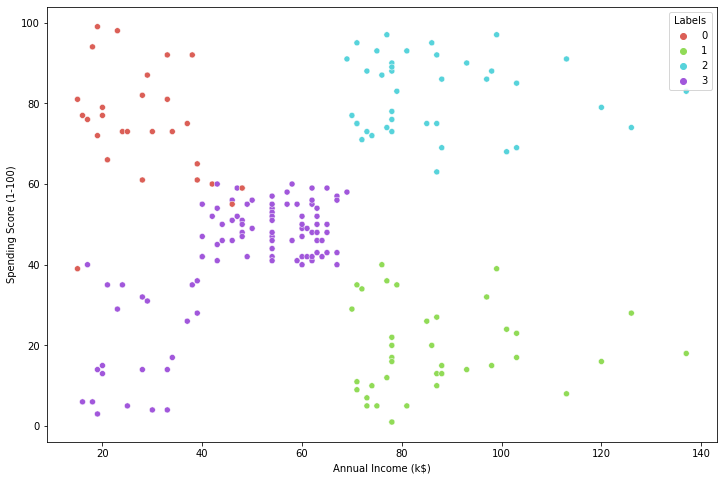

In [31]:
km4 = KMeans(n_clusters=4).fit(df)
 
df['Labels'] = km4.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=df['Labels'], 
                palette=sns.color_palette('hls', 4))
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


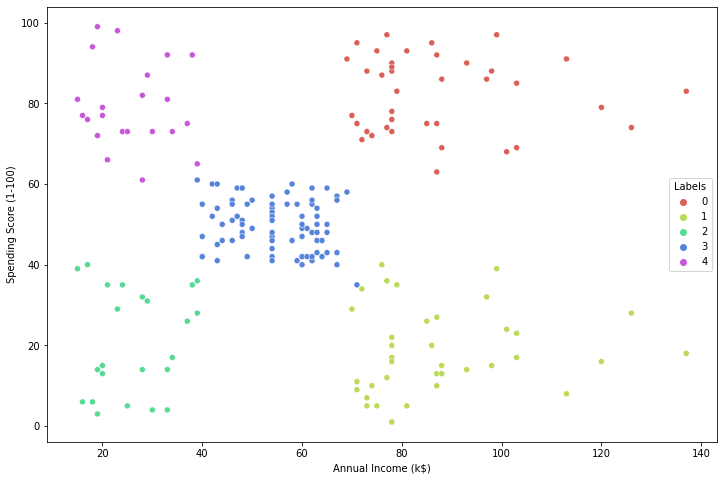

In [27]:
km5 = KMeans(n_clusters=5).fit(df)
 
df['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=df['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.show()


So from here you can clearly see that there are 5 different types of customers -

Annual Income low, spending score low ( Label 2)

Annual Income low, spending score high ( Label 4)

Annual Income high, spending score low ( Label 1)

Annual Income high, spending score high ( Label 0)

Annual Income medium, spending score medium ( Label 3)
